Let's make a flux plot after having run the flux analysis in the QN cosmic ray elab.

In [149]:
import pandas as pd

First load the data file into a data frame, defining the columns, and show the contents:

In [150]:
names = ['date', 'time', 'flux', 'err']

df = pd.read_csv('data/flux.out', delim_whitespace=True, header=0, names=names, skiprows=[0,1])
df.head()

,date,time,flux,err
0,05/17/2016,03:00:07,5.920090,0.798265
1,05/17/2016,05:00:07,5.920090,0.798265
2,05/17/2016,07:00:07,7.319383,0.887606
3,05/17/2016,09:00:07,5.920090,0.798265
4,05/17/2016,11:00:07,5.704814,0.783616


In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We need to handle the date and times and specify a time zone:

In [152]:
dt = df['date'] + ' ' + df['time']

datetime = pd.to_datetime(dt, format='%m/%d/%Y %H:%M:%S')
datetime = datetime.apply(lambda x: x.tz_localize('US/Central'))

tds = datetime - datetime[0]
tds = tds.apply(lambda x: x.days*24 + (x.seconds/3600.))

Now plot the flux as a function of the number of hours since the start of our time range:

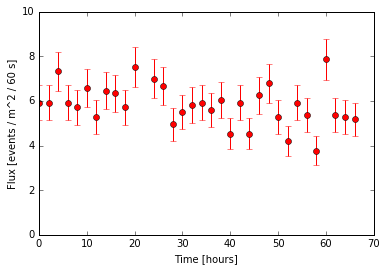

In [153]:
plt.errorbar(x=tds, y=df['flux'], yerr=df['err'], linestyle='None', color='r', marker='o')
plt.ylim((0,10))
plt.xlabel('Time [hours]')
plt.ylabel('Flux [events / m^2 / 60 s]')
plt.show()